# WEEK 4- Cohort and Hue-Based Analysis

In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("preprocessed_kids_screen_time.csv")
df.head(7)

,Age,Age_group,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Device_Type,Screen_Size,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Health_Status,Urban_or_Rural
0,14,Teenagers,Male,3.99,Smartphone,Portable,<30,True,0.42,"Poor Sleep, Eye Strain","Mental, Physical",Urban
1,11,Pre-Teens,Female,4.61,Laptop,Portable,<30,True,0.30,Poor Sleep,Mental,Urban
2,18,Late Teens,Female,3.73,TV,Fixed,>=30,True,0.32,Poor Sleep,Mental,Urban
3,15,Teenagers,Female,1.21,Laptop,Portable,<30,False,0.39,No Health Impacts,No Health Impacts,Urban
4,12,Pre-Teens,Female,5.89,Smartphone,Portable,<30,True,0.49,"Poor Sleep, Anxiety",Mental,Urban
5,14,Teenagers,Female,4.88,Smartphone,Portable,<30,True,0.44,Poor Sleep,Mental,Urban
6,17,Late Teens,Male,2.97,TV,Fixed,>=30,False,0.48,No Health Impacts,No Health Impacts,Rural


## Cohort analysis

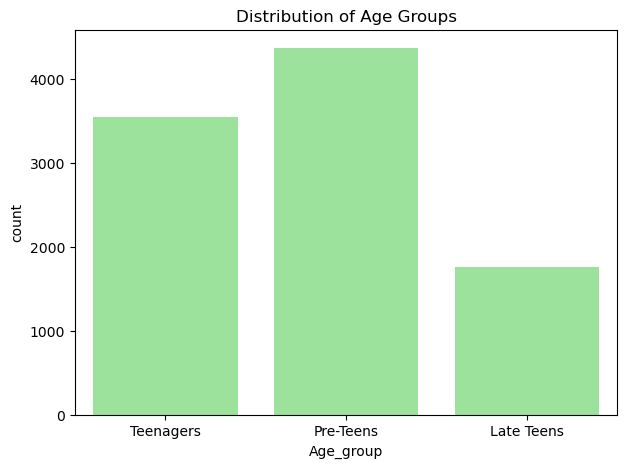

In [10]:
# Countplot - Age_group distribution
plt.figure(figsize=(7,5))
sns.countplot(x="Age_group", data=df, color="lightgreen")  
plt.title("Distribution of Age Groups")
plt.show()

### Insights
- Most participants belong to the **Pre-Teens** group, followed by **Teenagers**.  
- **Late Teens** form the smallest portion.  
- This indicates the dataset is dominated by younger users, which may influence screen time patterns.


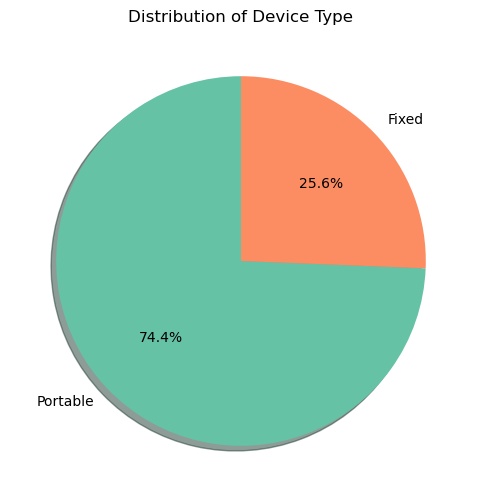

In [29]:
# Pie chart-Distribution of Device Type
plt.figure(figsize=(6,6))
df['Device_Type'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    colors=["#66c2a5", "#fc8d62"] 
)

plt.ylabel("")
plt.title("Distribution of Device Type")
plt.show()

### Insights
- Around **74%** of users use **portable devices** (mobiles, tablets, laptops).  
- Only **26%** use **fixed devices** (TVs, desktops).  
- This shows the increasing preference for **on-the-go screen usage** among younger users.


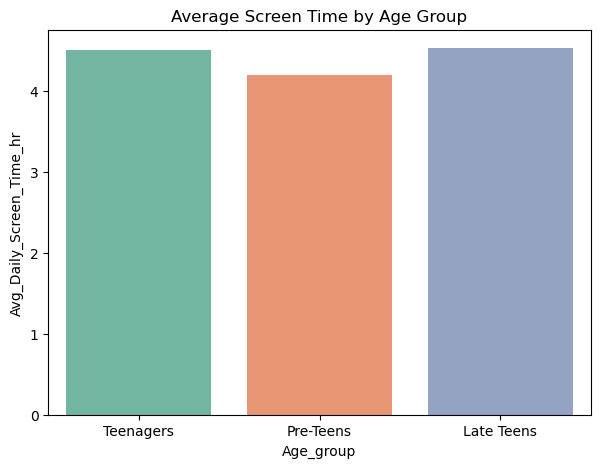

In [32]:
# countplot-Average Screen Time by Age Group
plt.figure(figsize=(7,5))
sns.barplot(
    x="Age_group", 
    y="Avg_Daily_Screen_Time_hr", 
    data=df, 
    palette="Set2", 
    hue ="Age_group",
    errorbar=None
)

plt.title("Average Screen Time by Age Group")
plt.show()

### Insights
- **Teenagers** and **Late Teens** spend the **most screen time** (over 4 hours/day).  
- **Pre-Teens** have slightly lower screen time.  
- This suggests that **screen engagement increases with age**.


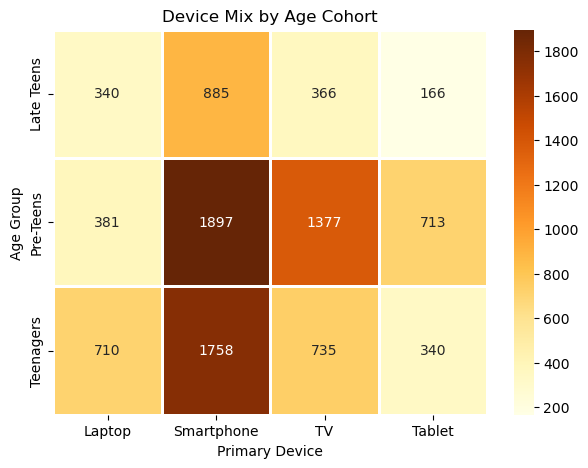

In [39]:
#  Heatmap - Age_group × Primary_Device
ct = pd.crosstab(df["Age_group"], df["Primary_Device"])

plt.figure(figsize=(7,5))
sns.heatmap(
    ct,
    annot=True,         
    fmt="d",            
    cmap="YlOrBr",     
    linewidths=1,       
    linecolor="white",  
    cbar=True           
)

plt.title("Device Mix by Age Cohort")
plt.xlabel("Primary Device")
plt.ylabel("Age Group")
plt.show()

### Insights
- Across all cohorts, **smartphones** are the most used primary device.  
- **TVs** are the second most common, while **laptops** and **tablets** show lower usage.  
- This highlights that **smartphones are central to daily digital activity**.

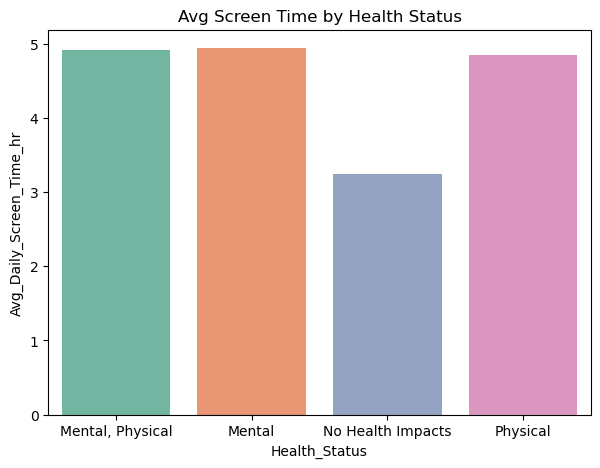

In [62]:
# Barplot - Health_Status vs Screen Time
plt.figure(figsize=(7,5))
sns.barplot(
    x="Health_Status",
    y="Avg_Daily_Screen_Time_hr",
    data=df,
    palette="Set2",
    errorbar=None,
    hue="Health_Status",          
)

plt.title("Avg Screen Time by Health Status")
plt.show()

### Insights
- Participants with **mental or physical health issues** have **higher screen times (~5 hrs/day)**.  
- Those with **no health impacts** show lower screen time (~3 hrs/day).  
- This indicates a possible **link between high screen time and health problems**.

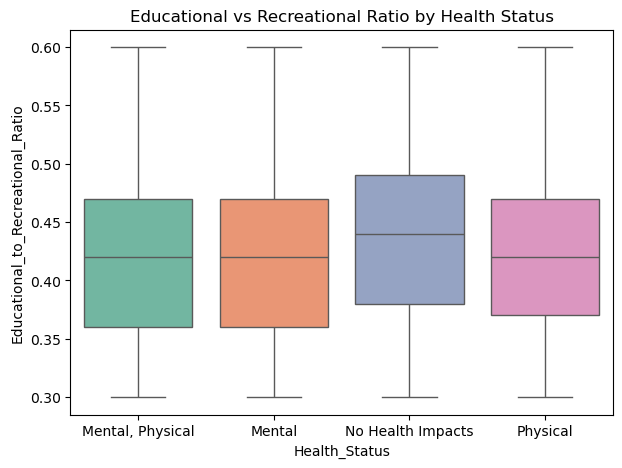

In [61]:
# Boxplot - Health_Status vs Edu/Recreational Ratio
plt.figure(figsize=(7,5))
sns.boxplot(
    x="Health_Status", 
    y="Educational_to_Recreational_Ratio", 
    hue="Health_Status",        
    data=df, 
    palette="Set2",               
)
plt.title("Educational vs Recreational Ratio by Health Status")
plt.show()

### Insights
- Across all health groups, the **educational-to-recreational ratio** remains around **0.4–0.45**.  
- Users with **no health impacts** show a slightly higher ratio.  
- This implies **most screen time is recreational**, regardless of health status.

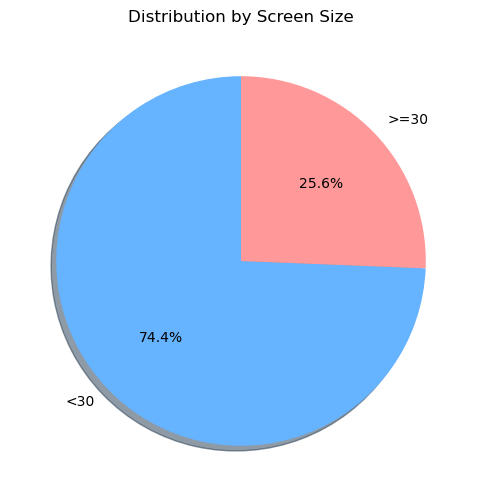

In [55]:
# Pie chart - Screen Size Cohort
plt.figure(figsize=(6,6))
df["Screen_Size"].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    shadow=True, 
    colors=["#66b3ff", "#ff9999"]  # Custom colors
)
plt.ylabel("")
plt.title("Distribution by Screen Size")
plt.show()

### Insights
- About **74%** of users have devices with **screens under 30 inches**.  
- **26%** use **larger screens** (TV).  
- Confirms that **small-screen devices dominate** in the dataset.

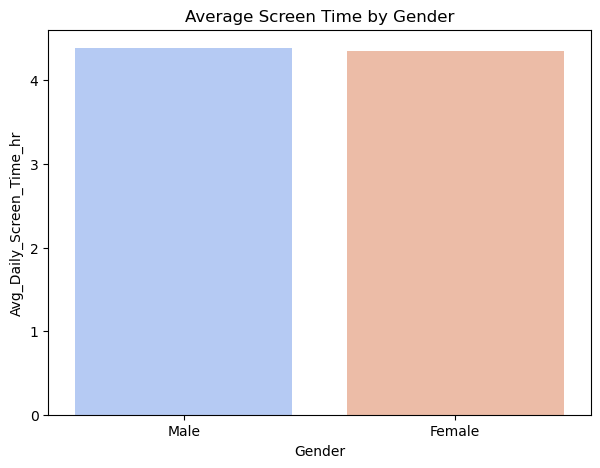

In [60]:
# barplot- Average Screen Time by Gender
plt.figure(figsize=(7,5))
sns.barplot(
    x="Gender", 
    y="Avg_Daily_Screen_Time_hr", 
    data=df, 
    hue="Gender",             
    palette="coolwarm", 
    errorbar=None,          
)
plt.title("Average Screen Time by Gender")
plt.show()

### Insights
- Both **males** and **females** spend almost **equal average screen time (~4.3 hours/day)**.  
- The difference is **minimal**, suggesting **screen habits are similar across genders**.  
- This implies that **gender is not a significant factor** influencing overall screen time.

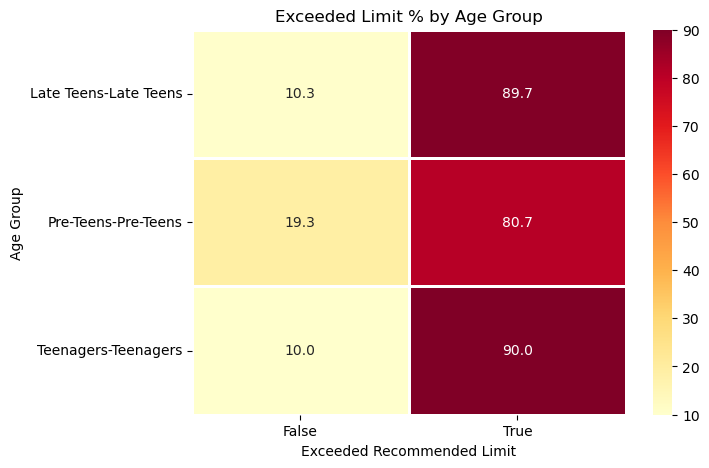

In [64]:
# Heatmap - Exceeded Limit % by Age Group
ct2 = (
    df.groupby(["Age_group", "Exceeded_Recommended_Limit"])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack()
)

plt.figure(figsize=(7,5))
sns.heatmap(
    ct2,
    annot=True,        
    fmt=".1f",         
    cmap="YlOrRd",     
    linewidths=1,     
    linecolor="white" 
)
plt.title("Exceeded Limit % by Age Group")
plt.xlabel("Exceeded Recommended Limit")
plt.ylabel("Age Group")
plt.show()

### Insights
- Around **80–90%** of users exceed the **recommended daily screen time limit**.  
- **Teenagers** are the most likely to exceed it.  
- This highlights a **consistent overuse of screens** across all age cohorts.

# HUE Analysis

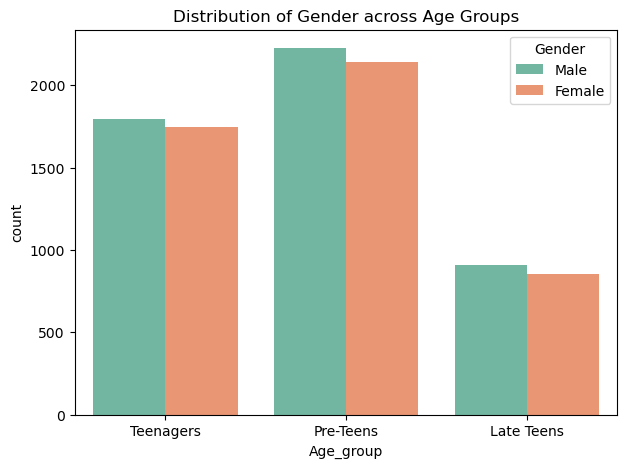

In [5]:
# countplot-Distribution of Gender across Age Groups
plt.figure(figsize=(7,5))
sns.countplot(
    x="Age_group",
    data=df,
    hue="Gender",      
    palette="Set2"
)
plt.title("Distribution of Gender across Age Groups")
plt.show()

### Insights
- The distribution of **Males and Females** is nearly balanced in all age groups.  
- **Pre-Teens** are the largest group, while **Late Teens** are fewer in count.  
- No major gender disparity is visible across age categories.

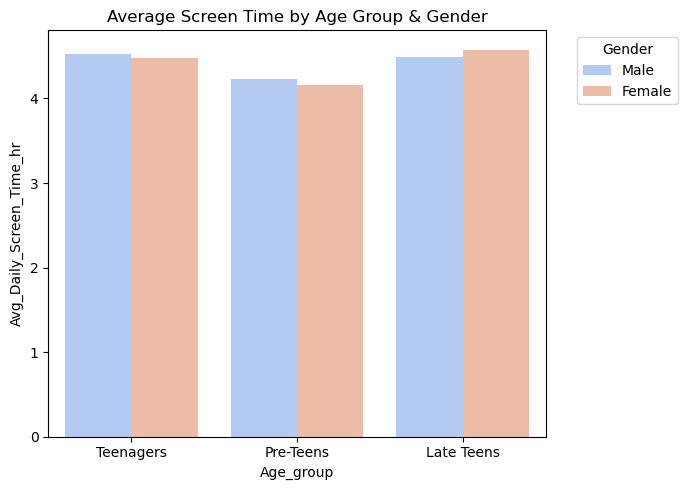

In [31]:
# barplot-Average Screen Time by Age Group & Gender
plt.figure(figsize=(7,5))
sns.barplot(
    x="Age_group",
    y="Avg_Daily_Screen_Time_hr",
    data=df,
    hue="Gender",
    palette="coolwarm",
    errorbar=None
)
plt.title("Average Screen Time by Age Group & Gender")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Insights
- **Teenagers** and **Late Teens** have slightly **higher average screen time** than **Pre-Teens**.  
- Both genders show **similar usage patterns**, indicating age impacts screen time more than gender.

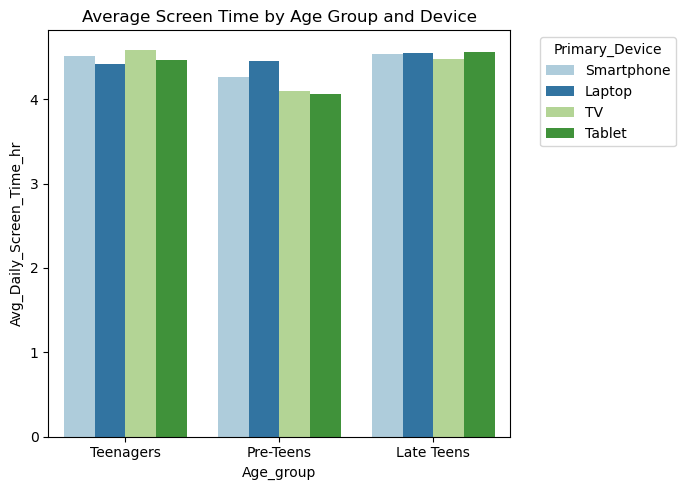

In [30]:
# Barplot - Average Screen Time by Age Group 
plt.figure(figsize=(7,5))
sns.barplot(x="Age_group", y="Avg_Daily_Screen_Time_hr", data=df, hue="Primary_Device", palette="Paired", errorbar=None)
plt.title("Average Screen Time by Age Group and Device")
plt.legend(title="Primary_Device", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Insights
- **Smartphones and Laptops** dominate across all age groups.  
- **TVs and Tablets** have relatively low average usage.  
- Device preference remains **consistent** regardless of age.

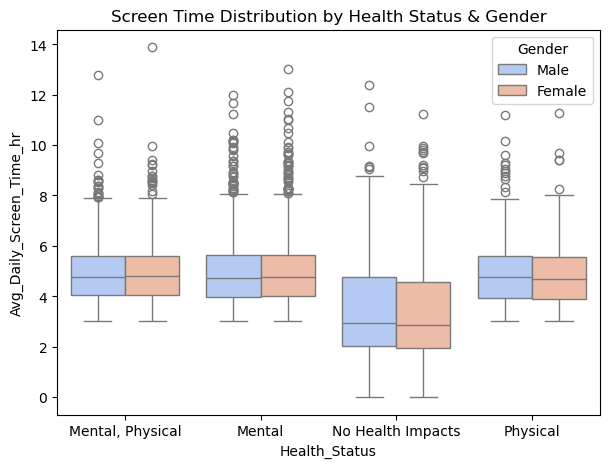

In [19]:
#  Boxplot - Daily Screen Time by Health Status (hue = Gender)
plt.figure(figsize=(7,5))
sns.boxplot(x="Health_Status", y="Avg_Daily_Screen_Time_hr", data=df, hue="Gender", palette="coolwarm")
plt.title("Screen Time Distribution by Health Status & Gender")
plt.show()

### Insights
- Users with **Mental** or **Mental & Physical** health issues show **higher screen time**.  
- Gender has minimal influence on the pattern — both show similar trends.  
- Suggests a potential **link between excessive usage and health impact**.

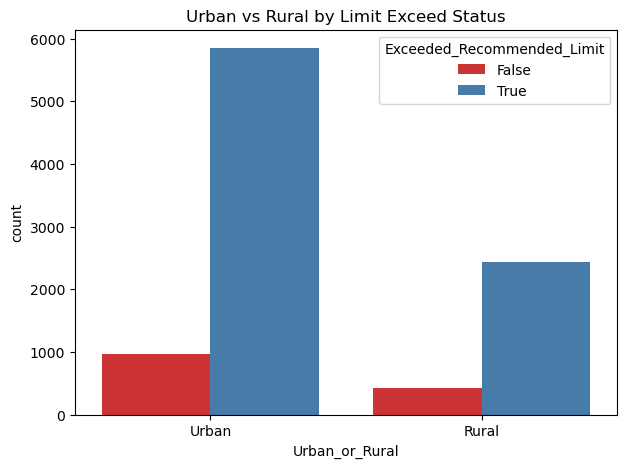

In [20]:
#  Countplot - Urban vs Rural
plt.figure(figsize=(7,5))
sns.countplot(x="Urban_or_Rural", data=df, hue="Exceeded_Recommended_Limit", palette="Set1")
plt.title("Urban vs Rural by Limit Exceed Status")
plt.show()

### Insights
- **Urban users** have a higher share exceeding the recommended screen time limit.  
- **Rural users** also show noticeable overuse, but slightly lower.  
- Screen overuse is **more prevalent in urban regions**, likely due to accessibility.

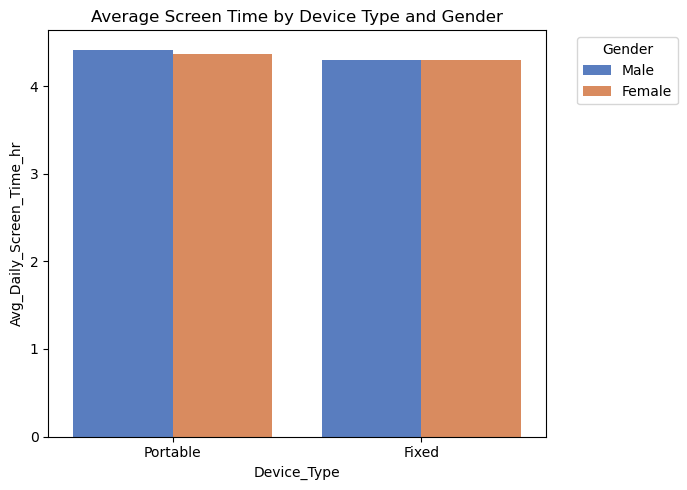

In [29]:
# Barplot - Screen Time by Device Type
plt.figure(figsize=(7,5))
sns.barplot(x="Device_Type", y="Avg_Daily_Screen_Time_hr", data=df, hue="Gender", palette="muted", errorbar=None)
plt.title("Average Screen Time by Device Type and Gender")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Insights
- **Portable devices** (Smartphones, Laptops,tablet) have **higher average screen time** than **TV**.  
- Gender differences are **minimal**, indicating similar device engagement levels.

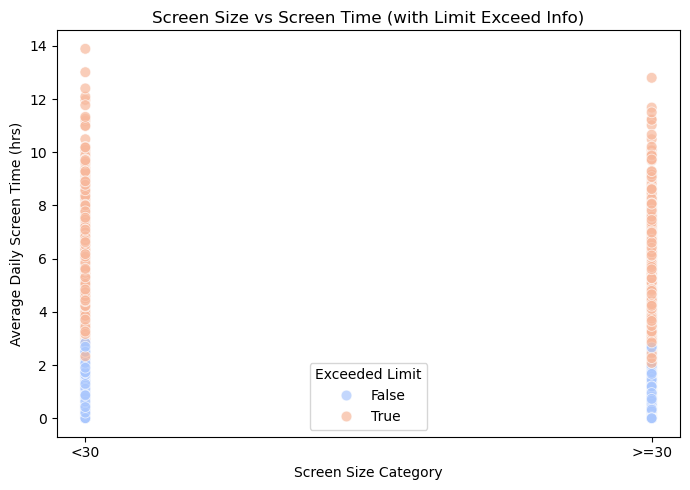

In [27]:
# Scatterplot - Screen Size vs Screen Time
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="Screen_Size",
    y="Avg_Daily_Screen_Time_hr",
    hue="Exceeded_Recommended_Limit",
    palette="coolwarm",
    alpha=0.7,
    s=60                # dot size
)

plt.title("Screen Size vs Screen Time (with Limit Exceed Info)")
plt.xlabel("Screen Size Category")
plt.ylabel("Average Daily Screen Time (hrs)")
plt.legend(title="Exceeded Limit")
plt.tight_layout()
plt.show()

### Insights
- Users of both **small and large screens** tend to **exceed screen time limits**.  
- Screen size doesn’t significantly affect total daily screen time.  
- Most users are spending **beyond the recommended limit**.

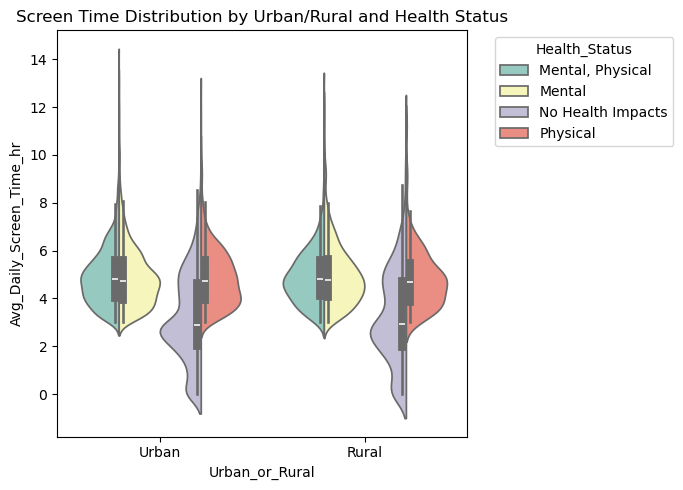

In [26]:
# Violinplot - Screen Time by Urban/Rural (hue = Health_Status)
plt.figure(figsize=(7,5))
sns.violinplot(x="Urban_or_Rural", y="Avg_Daily_Screen_Time_hr", data=df, hue="Health_Status", split=True, palette="Set3")
plt.title("Screen Time Distribution by Urban/Rural and Health Status")
plt.legend(title="Health_Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Insights
- **Urban users** show **wider variation** in screen time, especially with **mental health concerns**.  
- **Rural users** generally record **lower screen hours**.  
- Suggests screen time’s **mental health impact** is stronger in urban areas.

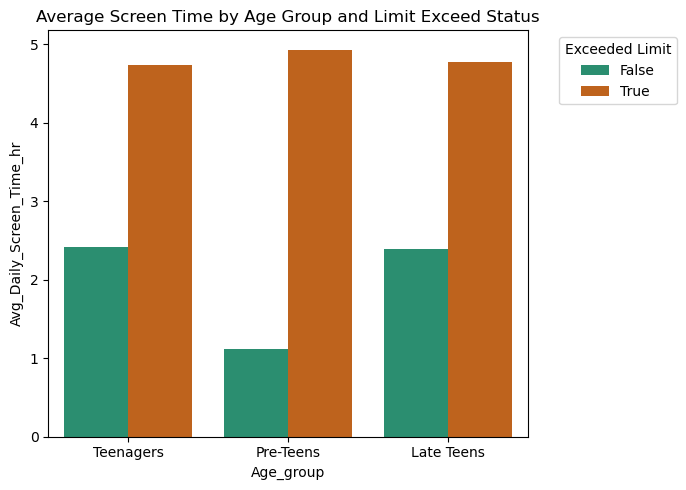

In [34]:
#  Barplot - Screen Time by Age Group (hue = Exceeded_Recommended_Limit)
plt.figure(figsize=(7,5))
sns.barplot(x="Age_group", y="Avg_Daily_Screen_Time_hr", data=df, hue="Exceeded_Recommended_Limit", palette="Dark2", errorbar=None)
plt.title("Average Screen Time by Age Group and Limit Exceed Status")
plt.legend(title="Exceeded Limit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Insights
- Across all age groups, most users **exceed the recommended screen time limit**.  
- **Pre-Teens** show the **largest difference**, spending significantly more hours above the limit.  
- **Teenagers and Late Teens** also have high screen hours, but the pattern is consistent across groups.  
- This suggests that **age does not strongly limit excessive screen use** — overuse is widespread.

# Week 4  -  Summary of Insights from Visualizations

- Average daily screen time is around **4–5 hours**, with many users **exceeding recommended limits**.  
- **Teenagers and urban users** show higher screen time than others.  
- **Gender differences** are minimal — both spend similar hours on screens.  
- **Smartphones** are the most used devices, and larger screens link to higher usage.  
- Users with **mental or physical health impacts** tend to have higher screen time.  
- **Hue plots** revealed subgroup differences (e.g., age × limit, health × location).  
- Overall, **excessive screen time is common across all groups**, especially among youth.